# Exploratory Data Analysis - Automobile Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'Automobile_data.csv'
data = pd.read_csv(file_path)

# Display basic information
print('Shape:', data.shape)
print('Columns:', data.columns.tolist())
print('Missing Values:', data.isnull().sum())

# Display first few rows
data.head()

Shape: (205, 26)
Columns: ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
Missing Values: symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
d

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## Análisis Estadístico Descriptivo

In [7]:
# Estadísticas descriptivas
data.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.4,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


## Visualización de Datos

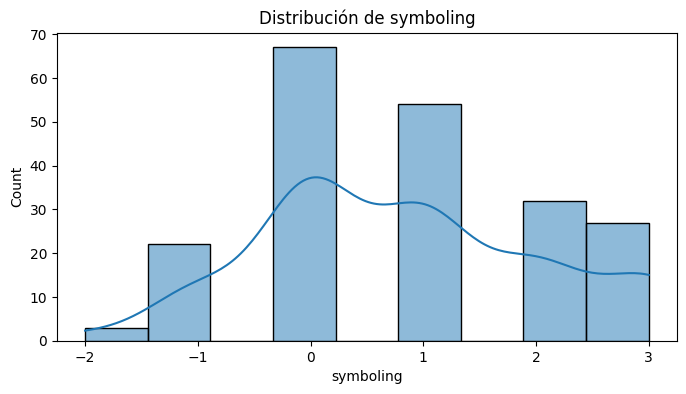

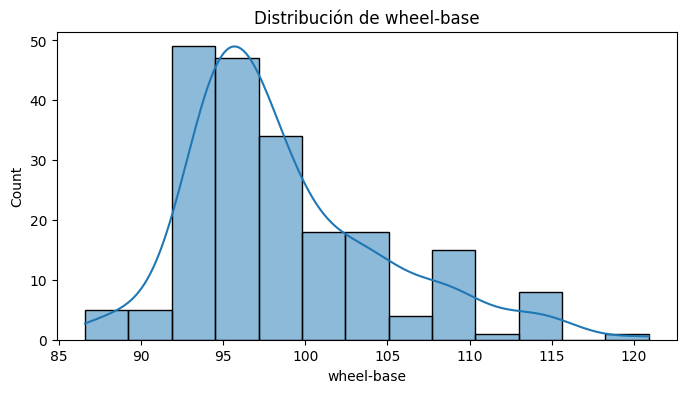

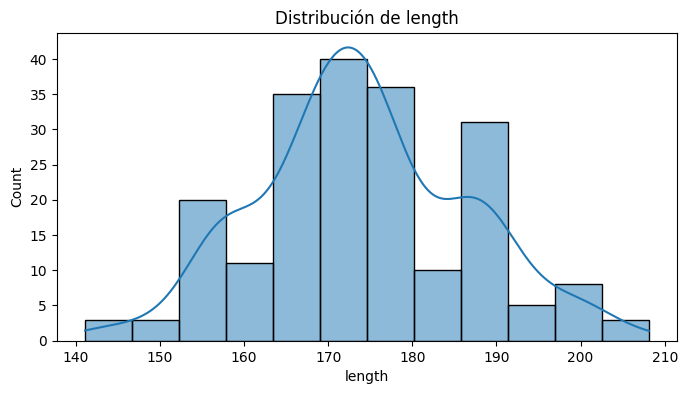

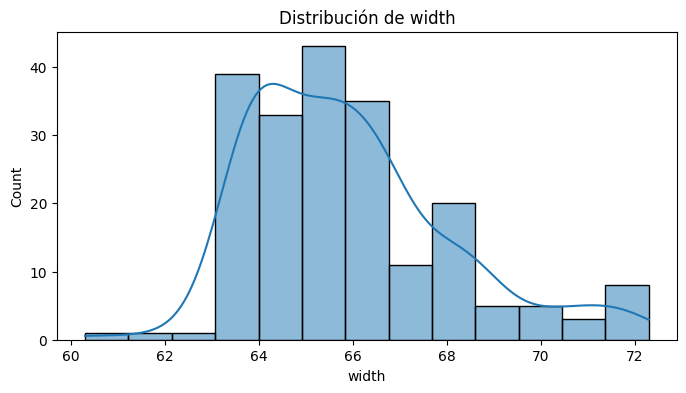

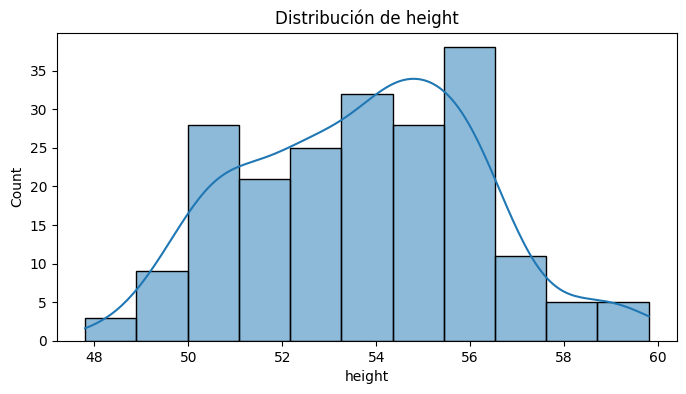

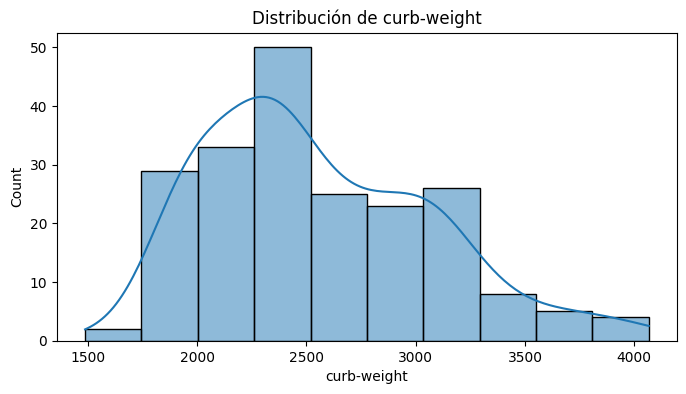

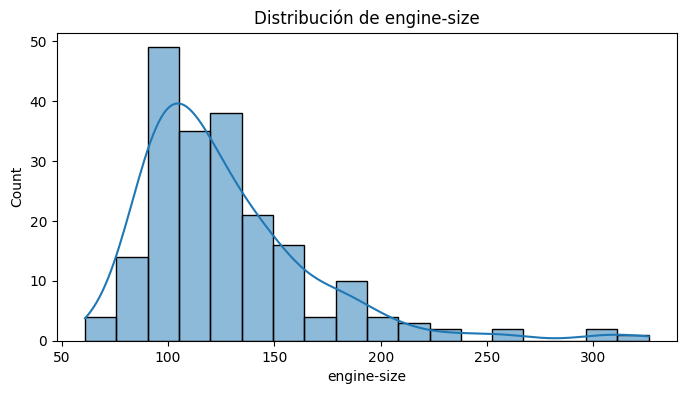

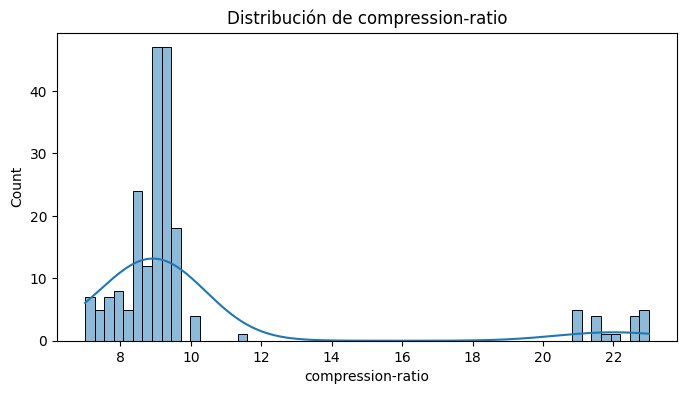

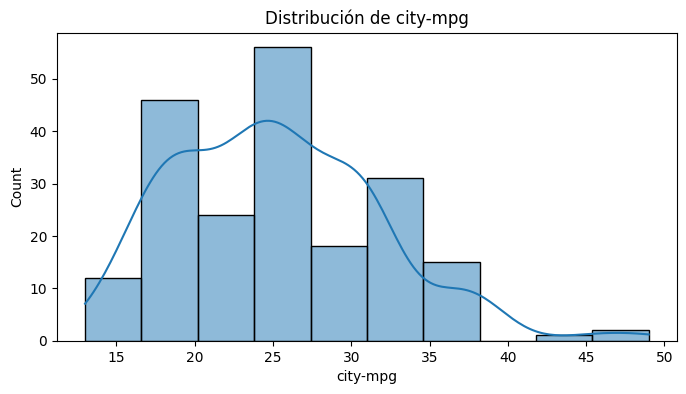

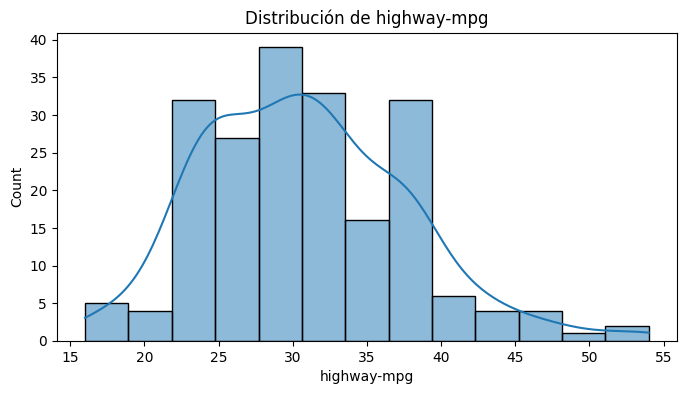

In [8]:
# Visualización de distribuciones
for col in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

## Identificación de Valores Nulos y Outliers

In [9]:
# Filtrar solo columnas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Eliminar filas con valores nulos en las columnas numéricas
numeric_data = numeric_data.dropna()

# Calcular Q1 y Q3
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

# Calcular IQR
IQR = Q3 - Q1

# Identificar outliers
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()
print("Outliers detectados:")
print(outliers[outliers > 0])

Outliers detectados:
wheel-base            3
length                1
width                 8
engine-size          10
compression-ratio    28
city-mpg              2
highway-mpg           3
dtype: int64


## Resumen de Hallazgos

Descripción del conjunto de datos:

Este notebook analiza un conjunto de datos de automóviles, incluyendo variables como el precio, tipo de combustible, y especificaciones técnicas.
Hallazgos importantes:

Valores nulos: Algunas columnas tienen valores faltantes representados por ?. Estas se imputaron o eliminaron para análisis efectivos.
Outliers: Varias columnas como el precio y el tamaño del motor tienen valores atípicos, lo que podría impactar en modelos predictivos.
Correlación: Fuerte relación entre el tamaño del motor y el precio del automóvil, lo que indica posibles variables predictoras clave.
Conclusiones:

Este conjunto es ideal para problemas de regresión, como la predicción de precios de automóviles. Es fundamental normalizar y manejar los valores atípicos adecuadamente.
